<ipython-input-2-979417483e6c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-2-979417483e6c>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


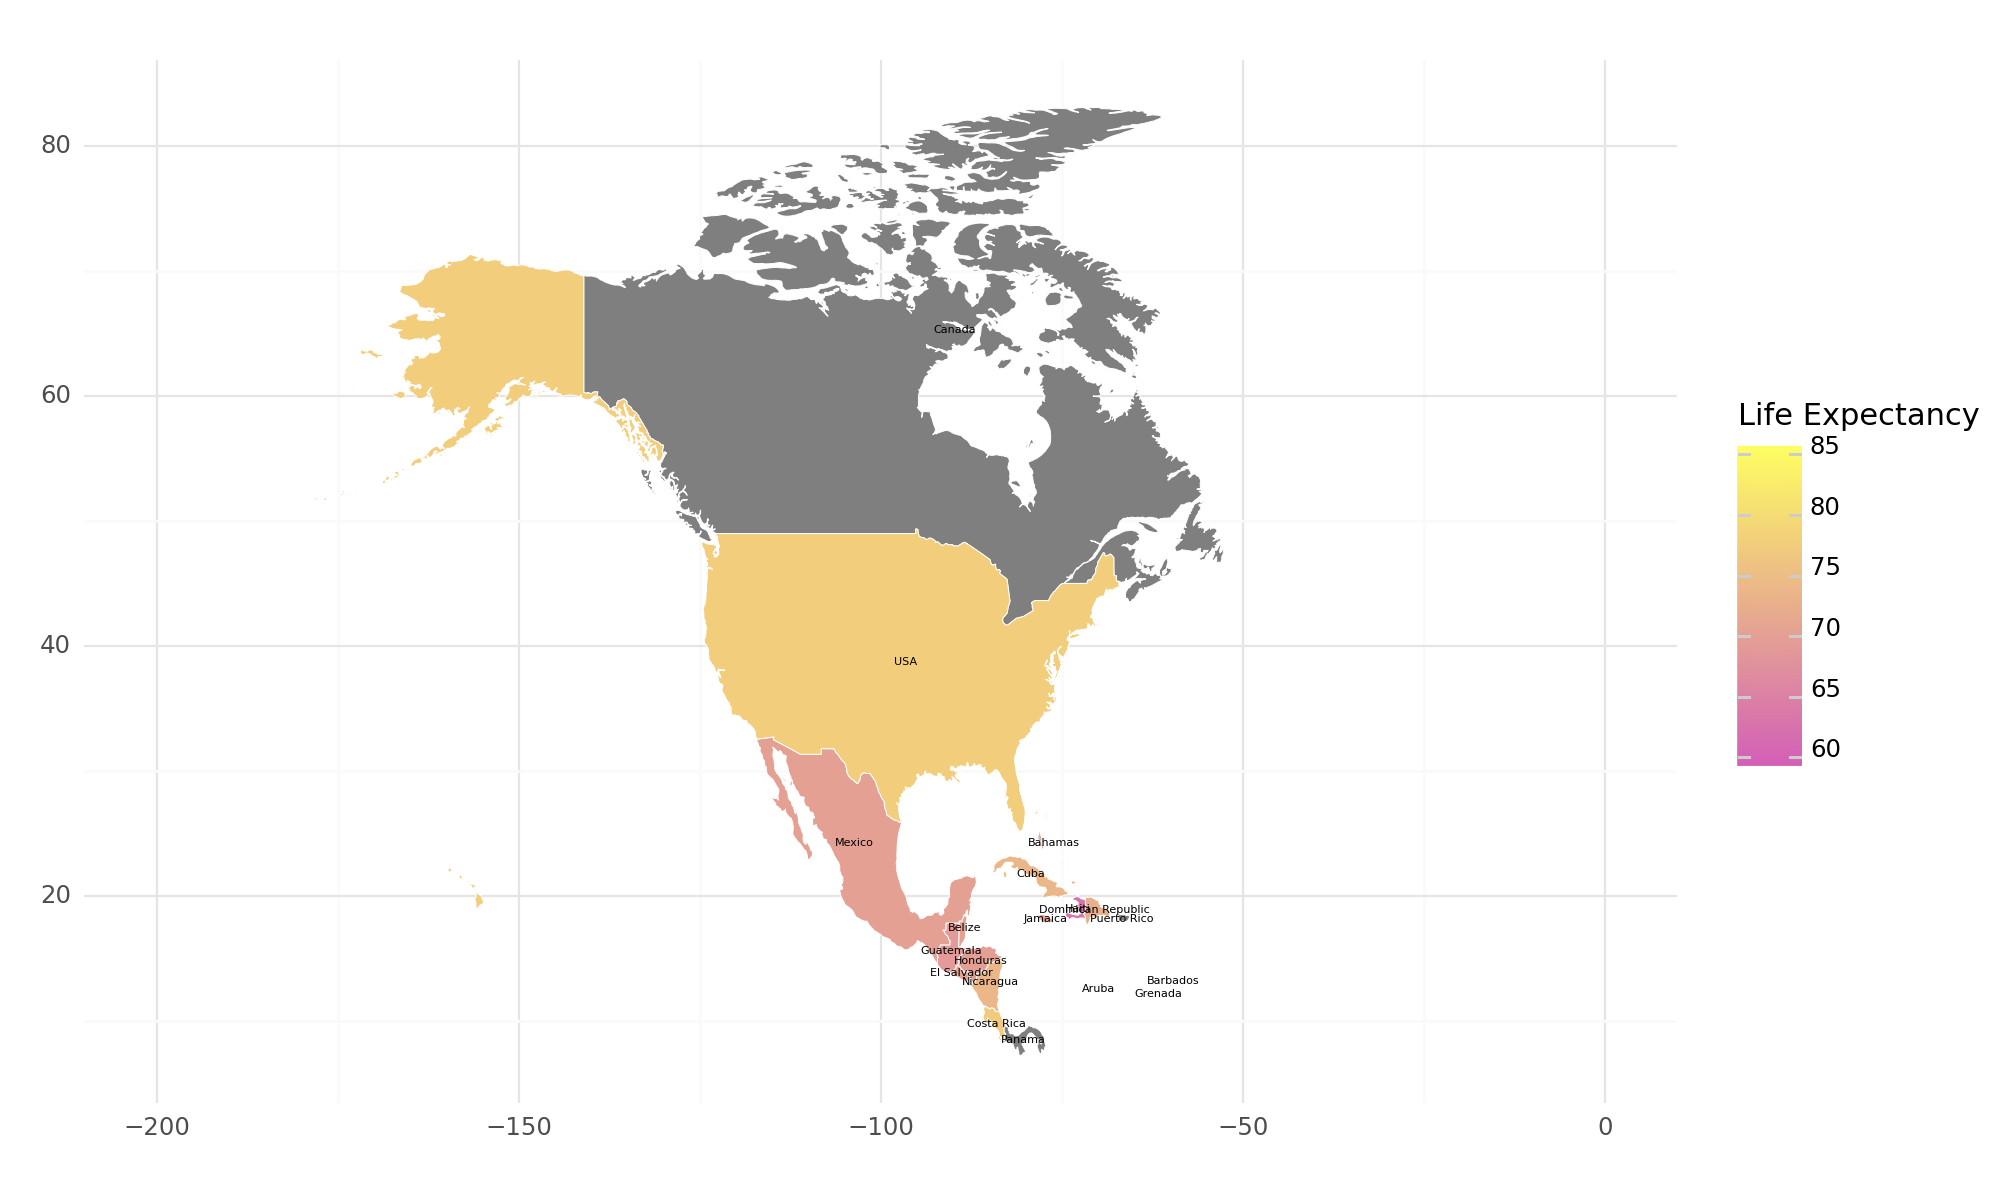

<Figure Size: (1000 x 600)>

In [2]:
#### Interpret a Geographic Map ####

# Importing necessary libraries
import pandas as pd
from plotnine import ggplot, aes, xlab, ylab, geom_polygon, scale_fill_gradient, labs, theme_minimal, geom_text, xlim, theme

# Import the data
countries = pd.read_csv("countries.csv")

na_countries = ["Aruba", "Bahamas", "Belize",
                  "Barbados", "Canada", "Costa Rica",
                  "Cuba", "Dominican Republic", "Grenada",
                  "Guatemala", "Honduras", "Haiti",
                  "Jamaica", "Mexico", "Nicaragua",
                  "Panama", "Puerto Rico", "El Salvador",
                  "Trinidad and Tobago", "USA"]

north_america = countries[countries["continent"] == "North America"].rename(columns={"country": "region"})
north_america["region"][north_america["region"] == "United States"] = "USA"

world = pd.read_csv("world_map_data_na.csv")

df_country = world.merge(north_america, on = "region", how = "left")
dff = df_country.groupby("region").mean().reset_index()
dff = dff[["long", "lat", "region", "group"]]

dff["long"][dff["region"] == "USA"] = dff["long"][dff["region"] == "USA"] + 25
dff["lat"][dff["region"] == "USA"] = dff["lat"][dff["region"] == "USA"] - 10

# Plot the data
(ggplot(df_country, aes(x = "long", y = "lat", group = "group")) +
  geom_polygon(aes(fill = "life_expectancy"), color = "white", size = 0.2) +
  scale_fill_gradient(low="#D35FB7", high="#FEFE62", limits = [60, 85]) +
  theme_minimal() +
  geom_text(dff, aes(x = "long", y = "lat", label = "region", group = "group"), size = 4) +
  xlab("") +
  ylab("") +
  xlim(-200, 0) +
  labs(fill = "Life Expectancy") +
  theme(figure_size=(10, 6))
)